In [1]:
!git clone https://github.com/tensorboy/pytorch_Realtime_Multi-Person_Pose_Estimation.git my_pose_repo


Cloning into 'my_pose_repo'...
remote: Enumerating objects: 461, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 461 (delta 2), reused 2 (delta 0), pack-reused 454 (from 1)
Receiving objects: 100% (461/461), 68.04 MiB | 35.86 MiB/s, done.
Resolving deltas: 100% (248/248), done.


In [2]:
%cd my_pose_repo

/kaggle/working/my_pose_repo


In [5]:
!pip install -r requirements.txt

In [6]:
!ls

demo	  experiments  readme	  requirements.txt  video_demo.py
evaluate  lib	       README.md  train


In [7]:
!pip install gdown

# Create the folder for weights
!mkdir -p model/weight

# Download the model from Google Drive
!gdown https://drive.google.com/uc?id=1_g4z0c1m5y7TY9FXki8uTf3JEtkTSSPF -O model/weight/pose_model.pth


Downloading...
From (original): https://drive.google.com/uc?id=1_g4z0c1m5y7TY9FXki8uTf3JEtkTSSPF
From (redirected): https://drive.google.com/uc?id=1_g4z0c1m5y7TY9FXki8uTf3JEtkTSSPF&confirm=t&uuid=dc78ebc2-3d89-4456-a311-39fc9f58569d
To: /kaggle/working/my_pose_repo/model/weight/pose_model.pth
100%|█████████████████████████████████████████| 209M/209M [00:00<00:00, 227MB/s]


In [8]:
!ls -lh model/weight


total 200M
-rw-r--r-- 1 root root 200M Feb 12 07:26 pose_model.pth


In [9]:
!apt-get update
!apt-get install -y swig


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://cli.github.com/packages stable InRelease [3,917 B]               
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]        
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]           
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]      
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]      
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [85.0 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,361 kB]
Get:11 https://cli.github.com/packages stable/main amd64 Packages [356 B]      
Get:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get

In [10]:
%cd lib/pafprocess
!sh make.sh
%cd ../../

/kaggle/working/my_pose_repo/lib/pafprocess
/kaggle/working/my_pose_repo


In [15]:
%cd /kaggle/working/my_pose_repo
!cp model/weight/pose_model.pth pose_model.pth


/kaggle/working/my_pose_repo


In [16]:
!python demo/picture_demo.py

Bulding VGG19
0.5459940652818991


In [49]:
# Navigate to the demo folder
%cd /kaggle/working/my_pose_repo/demo

# Replace the old image path with the new one
!grep "input" picture_demo.py


/kaggle/working/my_pose_repo/demo
test_image = "/kaggle/input/pose-test1/pose_test2.jpg"    # your uploaded image


In [55]:
!ls /kaggle/input/pose-test1

ls: cannot access '/kaggle/input/pose-test1': No such file or directory


In [78]:
!grep "input" /kaggle/working/my_pose_repo/demo/picture_demo.py


test_image = "/kaggle/input/hijab-woman-1/images (2).jpg"


In [77]:
!sed -i 's|.*test_image = .*|test_image = "/kaggle/input/hijab-woman-1/images (2).jpg"|g' /kaggle/working/my_pose_repo/demo/picture_demo.py


In [79]:
%cd /kaggle/working/my_pose_repo
!python demo/picture_demo.py


/kaggle/working/my_pose_repo
Bulding VGG19
Image scale factor: 2.647482014388489
Pose estimation finished! Output saved as result.png


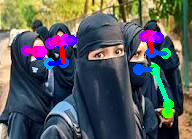

In [81]:
from IPython.display import Image, display
display(Image("result.png"))